# Giorno 6 — Modelli Lineari Avanzati

Questa lezione introduce la parte più importante per comprendere davvero i modelli lineari: la loro geometria.  
Non basta saper usare una logistic regression; bisogna capire come ragiona nello spazio dei dati, quali sono i suoi limiti e come interpretarli.

## Obiettivi della lezione
- Comprendere la geometria che sta dietro ai modelli lineari.
- Analizzare la Logistic Regression al di là della superficie: logit, sigmoide e confine di decisione.
- Capire quando e perché i modelli lineari falliscono su dati non linearmente separabili.
- Studiare la Log-Loss e il motivo per cui è centrale per i classificatori probabilistici.
- Analizzare la sensibilità della Logistic Regression ai valori anomali (outlier).
- Comprendere la regolarizzazione (L1, L2, Elastic Net) e la collinearità dei predittori.
- Studiare l’effetto della soglia di classificazione e come ottimizzarla.

La lezione è progettata per fornire una comprensione operativa della Logistic Regression, unendo geometria, probabilità e interpretabilità.

## Perché questa lezione è cruciale

La Logistic Regression è un modello semplice, ma è spesso usata in contesti critici:
- valutazione del rischio (default, frodi, churn);
- screening medico o diagnostica preliminare;
- sistemi di rilevamento anomalie;
- problemi di scoring dove la probabilità conta più della classe finale.

Senza comprendere i concetti geometrici alla base, si rischia di usarla come una scatola nera.  
Qui puntiamo a togliere la scatola, vedere la struttura e capire come sfruttarla davvero.

## Tre applicazioni reali
1. **Rischio bancario**: la logistic regression assegna una probabilità di insolvenza; l’interpretabilità dei pesi è fondamentale.  
2. **Medicina predittiva**: modelli lineari vengono preferiti perché la frontiera di decisione e i contributi dei fattori devono essere espliciti.  
3. **Churn prediction**: il confine tra clienti fedeli e a rischio può essere analizzato geometricamente per capire quali variabili diventano decisive.

## Metodo di pensiero consigliato
- Separare sempre la *geometria* (come i dati vengono separati nello spazio) dalla *probabilità* (come interpretiamo la distanza dal confine).
- Ridurre ogni intuizione a un caso in 2D: ciò che osserviamo visivamente in due dimensioni è esattamente ciò che accade in dimensioni maggiori.
- Chiedersi come varia la frontiera quando cambiano i pesi o quando introduciamo regolarizzazioni.

La lezione prosegue sviluppando questi concetti in modo graduale e visivo.


# Section 2 — Geometria dei Modelli Lineari

Questa sezione chiarisce come un modello lineare “vede” lo spazio dei dati.  
L’obiettivo è capire la struttura geometrica che regola la Logistic Regression, così da interpretarla in modo corretto e non come una scatola nera.

---

## 2.1 Il cuore del modello lineare

Un modello lineare si basa sull’espressione:

\[
z = w^T x + b
\]

Interpretazione intuitiva:

- \(x\): il punto da classificare, rappresentato dalle sue caratteristiche.
- \(w\): la direzione verso cui il modello guarda.
- \(b\): uno spostamento del confine di decisione.
- \(z\): un valore grezzo (logit) che indica quanto il punto è allineato alla direzione scelta.

Il termine \(w^T x\) misura quanto il punto proietta nella direzione di \(w\).  
Modificando \(w\), cambiamo l’orientamento del confine; modificando \(b\), lo spostiamo parallelamente.

---

## 2.2 Il confine di decisione

Il confine di classificazione (decision boundary) è definito da:

\[
w^T x + b = 0
\]

Tutti i punti che soddisfano questa equazione si trovano esattamente sul confine.

Interpretazione pratica:

- se \(w^T x + b > 0\), il punto è assegnato alla classe 1;
- se \(w^T x + b < 0\), il punto è assegnato alla classe 0.

Dal punto di vista geometrico:

- in 2D, il confine è una retta;
- in 3D, è un piano;
- in dimensioni maggiori, è un iperpiano.

Nonostante il numero di dimensioni, l’idea rimane identica: il modello divide lo spazio con un taglio lineare.

---

## 2.3 Quanto è lontano un punto dal confine?

La distanza perpendicolare di un punto dall’iperpiano è:

\[
d(x) = \frac{|w^T x + b|}{\|w\|}
\]

Significato:

- il numeratore rappresenta quanto il punto si trova “oltre” il confine, espresso nel sistema di coordinate del modello;
- il denominatore normalizza questa distanza per evitare che pesi molto grandi producano valori distorti.

Un punto molto distante dal confine è classificato con maggiore sicurezza; uno vicino al confine rappresenta un caso ambiguo.

---

## 2.4 La sigmoide: dal logit alla probabilità

La Logistic Regression usa la funzione sigmoide per convertire il logit in probabilità:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Comportamento della funzione:

- per valori negativi grandi, la probabilità tende a 0;
- per valori attorno a 0, il modello è incerto (probabilità circa 0.5);
- per valori positivi grandi, la probabilità tende a 1.

La sigmoide serve a mappare una quantità continua in un intervallo interpretabile come probabilità.

Punto essenziale: la sigmoide **non cambia il confine di decisione**, che rimane dove \(z = 0\).

---

## 2.5 La forma della sigmoide

La sigmoide ha una forma a “S”:

- schiacciata verso 0 per logit molto negativi;
- sensibile e ripida attorno a 0;
- schiacciata verso 1 per logit molto positivi.

L’area centrale attorno allo zero è la più informativa: piccole variazioni del logit causano cambiamenti significativi nella probabilità.

---

## 2.6 Esempi e applicazioni reali

### Esempio 1 — Classificazione email spam/non spam  
- Le caratteristiche possono includere numero di link, parole tipiche dello spam, lunghezza del testo, orario di invio.  
- La direzione \(w\) riflette quanto ciascuna caratteristica è indicativa di spam.  
- Il confine separa email “neutre” da email sospette.

Valori di logit molto grandi indicano email probabilmente spam, valori vicini allo zero indicano ambiguità.

---

### Esempio 2 — Valutazione del rischio di insolvenza  
- Le variabili possono includere reddito, debiti esistenti, stabilità lavorativa, storico di pagamento.  
- La Logistic Regression produce una probabilità di default.  
- La geometria del modello permette di verificare quali variabili spingono un individuo verso la regione “ad alto rischio”.

Un punto vicino al confine rappresenta un caso borderline, utile nelle decisioni di credito.

---

### Esempio 3 — Churn dei clienti  
- Le caratteristiche includono frequenza d’uso, durata del contratto, chiamate al supporto, recensioni.  
- Il confine separa clienti stabili da clienti a rischio.  

I punti vicini al confine sono i più preziosi: la loro distanza dal confine rappresenta quanto sia fragile la relazione con il servizio.

---

## 2.7 Metodi di pensiero consigliati

### Metodo 1 — Visualizza sempre in due dimensioni  
Anche con molte variabili, riduci mentalmente tutto a una retta che separa due gruppi.  
Il ragionamento geometrico è identico; cambia solo la dimensione matematica.

---

### Metodo 2 — Interpreta \(w\) come direzione  
- Cambiare \(w\) significa ruotare il confine.  
- Cambiare \(b\) significa traslarla.  

La geometria della decisione è interamente contenuta in questi due termini.

---

### Metodo 3 — Separa geometria e probabilità  
- La separazione effettiva dei punti (chi sta da quale lato) è determinata da \(w^T x + b\).  
- La probabilità è solo un’interpretazione successiva fornita dalla sigmoide.

Capire questa distinzione aiuta a interpretare il comportamento del modello e a diagnosticare gli errori.

---


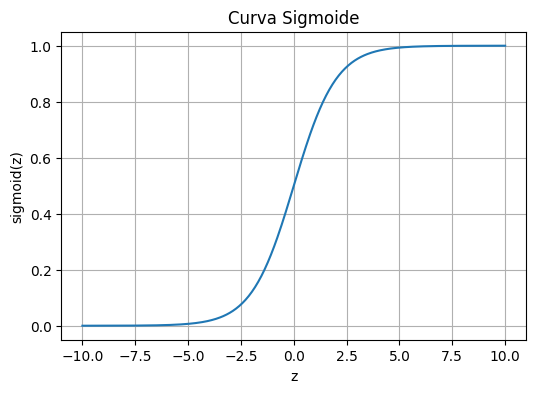

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 400)
sig = 1 / (1 + np.exp(-z))

plt.figure(figsize=(6,4))
plt.plot(z, sig)
plt.title("Curva Sigmoide")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

# Section 3 — Fallimento dei Modelli Lineari su Dati Non Lineari

I modelli lineari funzionano bene quando la separazione tra le classi può essere descritta da un confine dritto.  
Quando la struttura dei dati è più complessa, il modello lineare non riesce più a rappresentare la realtà: la sua geometria rigida diventa un limite strutturale.

---

## 3.1 Quando i modelli lineari falliscono

Un modello lineare fallisce quando la separazione tra le classi **non è descrivibile** tramite un iperpiano.  
Questo avviene ogni volta che la geometria dei dati è intrinsecamente curva, annidata o con pattern radiali.

Esempi di strutture non linearmente separabili:

- cerchi concentrici;
- pattern a mezza luna;
- forme ad anello;
- confini curvi o ondulati;
- cluster che si intersecano.

Il limite non dipende dalla quantità di dati, ma dalla rigidità della forma della frontiera: è sempre una retta generalizzata.  
Per quanto si alleni, un modello lineare non potrà mai "curvare" il confine.

---

## 3.2 Segnali pratici del fallimento

Quando un modello lineare non può rappresentare la struttura del problema, emergono sintomi riconoscibili:

- accuratezza bassa o stagnante anche aumentando il training;
- confini di decisione controintuitivi o altamente inclinati;
- coefficienti \(w\) instabili;
- logit che oscillano molto senza fornire separazioni utili;
- presenza di molti punti vicini al confine (problema di bassa marginatura).

Questi segnali indicano non un errore nei dati, ma un errore nel tipo di modello scelto.

---

## 3.3 Tre esempi reali di fallimento

### Esempio 1 — Rilevamento frodi tramite pattern non lineari  
Le frodi nelle transazioni spesso seguono pattern complessi, come cluster ad anello o distribuzioni multimodali.  
Una logistic regression traccia un unico confine lineare che non riesce a catturare queste forme.  
Il risultato è un tasso elevato di falsi positivi o falsi negativi, anche con dataset molto grandi.

---

### Esempio 2 — Visione artificiale: riconoscere oggetti  
Molti problemi di visione (per esempio distinguere un cerchio da un quadrato) non sono linearmente separabili nello spazio dei pixel.  
Un modello lineare vede soltanto una combinazione pesata dei pixel, non le forme.  
Senza feature engineering avanzato o modelli più potenti, fallisce sistematicamente.

---

### Esempio 3 — Analisi di segmenti clienti con pattern ad anello  
In certi mercati, i clienti si distribuiscono in segmenti non lineari: ad esempio, clienti molto simili economicamente ma con due comportamenti distinti.  
La struttura a “luna” o “anello” porta il modello lineare a tracciare un confine che taglia i gruppi nel modo sbagliato.

---

## 3.4 Perché la geometria lineare è insufficiente

Il modello lineare utilizza una funzione del tipo:

\[
f(x) = w^T x + b
\]

Questa funzione definisce automaticamente un confine lineare.  
Non esiste alcun termine che permetta una curvatura, una piega o una torsione della frontiera.

Per ottenere frontiere curve, servono:

- trasformazioni non lineari delle feature (ad esempio polinomiali);
- kernel methods (SVM con kernel);
- reti neurali;
- modelli tree-based (Random Forest, Gradient Boosting).

La Logistic Regression, lasciata com’è, non può adattarsi a strutture curve.

---

## 3.5 Metodo di pensiero per riconoscere i limiti

### Metodo 1 — Visualizzare mentalmente la forma della separazione  
Se il tuo problema, ridotto a due feature, mostra un confine curvo, il modello lineare non è adatto.

---

### Metodo 2 — Analizzare la distribuzione dei punti rispetto al confine stimato  
Se molti punti corretti si trovano vicino al confine stimato, il modello sta lottando contro la geometria del problema.

---

### Metodo 3 — Controllare la stabilità dei coefficienti  
Coefficienti che cambiano molto al variare del dataset (o dei fold della cross-validation) indicano che il modello sta forzando una struttura lineare su dati che non la possiedono.

---

## 3.6 Conclusione della sezione

Il fallimento dei modelli lineari non deriva dalla mancanza di dati o dalla qualità dell’ottimizzazione, ma da un limite geometrico intrinseco.  
Questa sezione prepara il terreno alla successiva, che introduce la Log-Loss e la visione probabilistica del modello lineare, fondamentali per comprendere dove il modello eccelle e dove invece non può arrivare.


Accuracy: 0.472


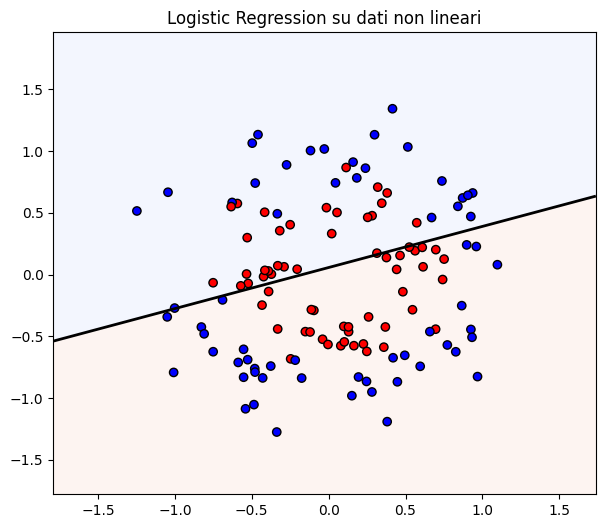

In [2]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# dataset non lineare
X, y = make_circles(n_samples=500, factor=0.5, noise=0.15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_s, y_train)

y_pred = clf.predict(X_test_s)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

# boundary
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.decision_function(scaler.transform(grid)).reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z > 0, alpha=0.1, cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr', edgecolor='k')
plt.title("Logistic Regression su dati non lineari")
plt.show()

# Section 4 — La Log-Loss e la Visione Probabilistica

La Logistic Regression non si limita a classificare i punti come “classe 0” o “classe 1”.  
Il suo vero potere è che fornisce **probabilità**.  
Per addestrare un modello che produce probabilità credibili, è necessario un criterio che misuri quanto le probabilità previste siano vicine alla realtà osservata.  
Questo criterio è la *log-loss*.

---

## 4.1 Perché non basta minimizzare gli errori di classificazione?

Se usassimo una funzione che conta soltanto quante volte il modello sbaglia, non avremmo alcuna informazione sulla qualità delle probabilità.

Esempio:

- Il modello A prevede 0.51 per classe 1.  
- Il modello B prevede 0.99 per classe 1.  
- Entrambi classificano correttamente il punto come positivo.

Ma il modello B è molto più sicuro.  
La semplice accuratezza non fa distinzione.

Serve una funzione di perdita sensibile al *grado* di sicurezza.  
La log-loss è costruita esattamente per questo.

---

## 4.2 Definizione della Log-Loss

Per un singolo punto con etichetta \(y \in \{0,1\}\) e probabilità predetta \(p = \sigma(z)\):

\[
\ell(y, p) = - \big[ y \log(p) + (1 - y) \log(1 - p) \big]
\]

Interpretazione:

- Se il punto è positivo (\(y=1\)), la perdita è \(-\log(p)\).  
  Se il modello assegna bassa probabilità alla classe corretta, la perdita esplode.
- Se il punto è negativo (\(y=0\)), la perdita è \(-\log(1-p)\).  
  Anche qui, assegnare alta probabilità alla classe sbagliata è punito severamente.

L’idea è semplice: **non conta solo se hai ragione, conta quanto eri sicuro.**

---

## 4.3 Perché la Log-Loss è la scelta naturale?

La log-loss nasce da un principio di massima verosimiglianza.  
Addestrare una logistic regression equivale a scegliere i parametri \(w\) e \(b\) che massimizzano la probabilità dei dati osservati.

In altre parole:

\[
\text{minimizzare la log-loss} \quad \Longleftrightarrow \quad \text{massimizzare la verosimiglianza dei dati}
\]

Questa equivalenza offre una base probabilistica solida, non arbitraria.

---

## 4.4 Proprietà desiderabili della Log-Loss

1. Penalizza gravemente essere sicuri della classe sbagliata.  
   È un comportamento razionale: sbagliare con convinzione è più grave che sbagliare per indecisione.

2. È continua e differenziabile.  
   Questo la rende adatta all’ottimizzazione con gradient descent.

3. Incoraggia probabilità calibrate.  
   Un modello con bassa log-loss non solo classifica bene, ma fornisce probabilità affidabili.

---

## 4.5 Esempi reali di utilizzo della log-loss

### Esempio 1 — Credit scoring  
Le banche non vogliono solo sapere se un cliente pagherà o meno: vogliono una probabilità numerica.  
La log-loss garantisce che il modello sia penalizzato se assegna probabilità irrealistiche, motivo per cui viene standardizzata nei sistemi di scoring.

---

### Esempio 2 — Medico-diagnostico  
In molte applicazioni mediche la soglia decisionale dipende dal contesto clinico.  
La probabilità prodotta dal modello è cruciale.  
La log-loss permette di addestrare modelli che non solo classificano, ma producono probabilità calibrate.

---

### Esempio 3 — Sistemi antifrode  
Gli analisti devono intervenire sulle transazioni più sospette.  
Previsioni calibrate aiutano a controllare la quantità di falsi positivi.  
Il modello che minimizza la log-loss fornisce il ranking più informativo.

---

## 4.6 Comportamento della log-loss nei casi estremi

### Caso 1 — Il modello è certo e corretto  
- Se \(y = 1\) e il modello prevede \(p = 0.99\), la perdita è molto piccola.  
- Essere sicuri e corretti viene premiato.

### Caso 2 — Il modello è incerto ma corretto  
- Se \(y = 1\) e \(p = 0.51\), la perdita è moderata.  
- Il modello non è forte, ma non è penalizzato eccessivamente.

### Caso 3 — Il modello è certo e sbaglia  
- Se \(y = 1\) e \(p = 0.01\), la perdita è enorme.  
- Il modello è severamente punito: sbagliare con sicurezza è il peggior comportamento possibile.

Questo comportamento è fondamentale per ottenere probabilità davvero utili.

---

## 4.7 Metodo di pensiero per comprendere la log-loss

### Metodo 1 — Pensare in termini di probabilità, non di classi  
La log-loss non si interessa a “0 contro 1”.  
Si interessa a quanto la previsione è coerente con i dati.

---

### Metodo 2 — Ragionare per verosimiglianza  
Interpretare la log-loss significa chiedersi:  
"Quanto il modello avrebbe considerato probabile osservare questi dati?"

---

### Metodo 3 — Controllare sempre i casi estremi  
Se un modello prevede probabilità troppo estreme per molti punti, la log-loss lo penalizzerà.  
Questo è un segno importante: il modello potrebbe essere mal calibrato.

---

## 4.8 Conclusione della sezione

La log-loss definisce il comportamento probabilistico della Logistic Regression.  
A differenza delle metriche semplici basate sugli errori, la log-loss cattura:

- la qualità della probabilità stimata,
- il grado di sicurezza del modello,
- la coerenza delle previsioni con i dati.

Comprendere la log-loss è essenziale per interpretare e addestrare correttamente modelli probabilistici.


# Section 5 — Sensibilità ai Valori Anomali (Outlier)

La Logistic Regression è un modello lineare che assegna probabilità attraverso la sigmoide.  
Nonostante la sua semplicità e interpretabilità, è sensibile alla presenza di outlier nelle variabili numeriche.  
Questa sezione spiega il motivo geometrico e probabilistico di questa sensibilità.

---

## 5.1 Perché gli outlier influenzano così tanto la Logistic Regression?

Ricordiamo che il modello costruisce un confine lineare definito da:

\[
w^T x + b = 0
\]

Per trovare i pesi \(w\) e il bias \(b\), il modello minimizza la log-loss.  
Gli outlier hanno un impatto enorme sulla log-loss perché:

- producono logit estremi, molto positivi o molto negativi;
- generano probabilità molto sbilanciate (vicine a 0 o 1);
- quando la previsione è sbagliata con alta sicurezza, la log-loss esplode.

Conseguenza:  
i pesi vengono “tirati” nella direzione degli outlier, deformando la geometria del confine.

---

## 5.2 Effetto geometrico degli outlier

Dal punto di vista geometrico, un punto lontano dagli altri può obbligare il modello a ruotare e traslare drasticamente l’iperpiano per minimizzare la perdita.

Questo causa:

- confini inclinati in modo innaturale,
- zone del feature space mal classificate,
- margini molto piccoli,
- instabilità nei coefficienti \(w\).

In altre parole, un solo outlier può fare cambiare direzione alla “freccia” \(w\) in modo significativo, degradando la qualità del modello.

---

## 5.3 Effetto probabilistico degli outlier

La log-loss penalizza molto i casi in cui:

- il modello assegna \(p \approx 1\) ma il punto è negativo,
- oppure assegna \(p \approx 0\) ma il punto è positivo.

Gli outlier rendono questi casi più probabili.

Quando un outlier si trova molto lontano dal confine e appartiene alla classe “sbagliata”, la sua perdita domina quella degli altri punti.  
Il modello, per compensare, modifica i pesi in direzione opposta, distorcendo la geometria.

---

## 5.4 Tre esempi reali di sensibilità agli outlier

### Esempio 1 — Analisi del reddito in credit scoring  
Un solo cliente con reddito estremamente alto, ma con un evento di insolvenza, può spingere il modello a sovrastimare l’importanza del reddito nella predizione del rischio.  
Questo produce frontiere che non riflettono il comportamento della popolazione generale.

---

### Esempio 2 — Dataset medici con errori di misurazione  
Se una variabile come la pressione sanguigna viene registrata con errore (es. 420 invece di 120), il logit associato diventa estremo.  
La sigmoide assegna probabilità fuori scala e la log-loss spinge il modello a correggere un singolo punto, compromettendo la qualità complessiva.

---

### Esempio 3 — Monitoraggio di transazioni online  
Un’unica transazione con valori numerici anomali può far spostare drasticamente il confine tra “normal” e “fraudolent”.  
Il modello diventa instabile e tende a sopravvalutare indicatori che non rappresentano la distribuzione reale.

---

## 5.5 Come identificare se il modello sta soffrendo per la presenza di outlier

Segnali tipici:

- coefficienti \(w\) molto grandi o instabili;
- accuratezza su train alta, ma molto bassa su validazione;
- confini geometrici inclinati in modo strano;
- presenza di probabilità estreme (vicine a 0 o 1) in modo sistematico;
- logit con valori molto più grandi per pochi punti rispetto al resto.

Per verificare questo fenomeno, può essere utile analizzare la distribuzione dei logit \(z = w^T x + b\).

---

## 5.6 Strategie per mitigare il problema

### 1. Norm


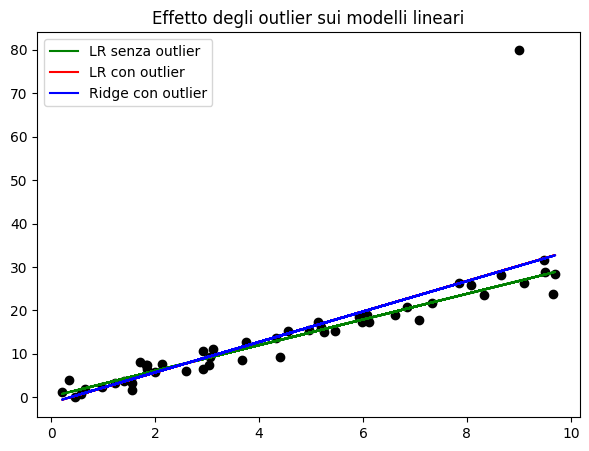

In [3]:
from sklearn.linear_model import LinearRegression, Ridge

np.random.seed(42)
X = np.random.rand(50, 1) * 10
y = 3 * X.squeeze() + np.random.randn(50) * 2

# aggiunta outlier
X_out = np.vstack([X, [[9]]])
y_out = np.concatenate([y, [80]])

lr = LinearRegression().fit(X, y)
lr_out = LinearRegression().fit(X_out, y_out)
ridge = Ridge(alpha=1.0).fit(X_out, y_out)

plt.figure(figsize=(7,5))
plt.scatter(X_out, y_out, color='black')
plt.plot(X, lr.predict(X), label='LR senza outlier', color='green')
plt.plot(X_out, lr_out.predict(X_out), label='LR con outlier', color='red')
plt.plot(X_out, ridge.predict(X_out), label='Ridge con outlier', color='blue')
plt.legend()
plt.title("Effetto degli outlier sui modelli lineari")
plt.show()

# Section 6 — Regolarizzazione, Collinearità e Stabilità dei Coefficienti

Quando si addestra una Logistic Regression, i coefficienti \(w\) non dipendono soltanto dai dati, ma anche dalla struttura statistica e numerica delle feature.  
Senza un meccanismo di controllo, i coefficienti possono diventare molto grandi, instabili e difficili da interpretare.  
La regolarizzazione nasce esattamente per questo: imporre un vincolo che impedisca al modello di adattarsi troppo ai dati e che garantisca stabilità, generalizzazione e robustezza.

---

## 6.1 Perché serve la regolarizzazione?

La log-loss tende a spingere i coefficienti verso valori estremi quando cerca di separare perfettamente i dati.  
Se esiste anche una separazione approssimativa, la Logistic Regression può reagire aumentando indefinitamente i coefficienti.

Conseguenze:

- modello instabile: piccole variazioni nei dati producono grandi variazioni nei coefficienti;
- sovradattamento: il modello si adatta a rumore e outlier;
- coefficienti molto grandi e difficili da interpretare;
- peggioramento drastico delle performance su nuovi dati.

La regolarizzazione introduce un costo aggiuntivo che penalizza i coefficienti troppo grandi.  
Questo forza il modello a rimanere più semplice e stabile.

---

## 6.2 Regolarizzazione L2 (Ridge)

La penalizzazione L2 aggiunge alla log-loss un termine proporzionale alla somma dei quadrati dei coefficienti:

\[
\text{Loss}_{L2} = \text{LogLoss} + \lambda \|w\|^2
\]

Interpretazione intuitiva:  
la L2 funziona come una “molla” che cerca di mantenere i coefficienti piccoli e armonizzati tra loro.

Effetti principali:

- riduce la magnitudine di tutti i coefficienti in modo morbido e continuo;
- stabilizza fortemente il modello in presenza di collinearità;
- riduce il rischio che singole variabili dominino il modello a causa della scala;
- rende i logit meno estremi, mitigando la sensibilità agli outlier.

Importante: L2 **non porta mai un coefficiente a zero**.  
Riduce, ma non elimina.  
Serve quando stabilità e robustezza sono prioritarie.

---

## 6.3 Regolarizzazione L1 (Lasso)

La penalizzazione L1 usa il valore assoluto dei coefficienti:

\[
\text{Loss}_{L1} = \text{LogLoss} + \lambda \|w\|_1
\]

Interpretazione intuitiva:  
la L1 è una “forbice matematica”: taglia via i coefficienti piccoli, spingendoli esattamente a zero.

Effetti principali:

- porta alcuni coefficienti a zero → selezione automatica delle feature;
- favorisce modelli più semplici e interpretabili;
- ottima quando si hanno molte variabili ma se ne sospetta un ruolo importante solo per alcune.

L1 è utile quando:

- si vuole identificare quali feature contano davvero;
- si lavora con dataset ad alta dimensionalità;
- il modello deve rimanere semplice senza perdere potere predittivo.

---

## 6.4 Elastic Net

Elastic Net combina entrambe le penalizzazioni:

\[
\text{Loss} = \text{LogLoss} + \alpha \|w\|_1 + (1 - \alpha)\|w\|^2
\]

Interpretazione intuitiva:  
è un compromesso tra “forbice” (L1) e “molla” (L2).

È utile quando:

- ci sono gruppi di feature collinearie e vogliamo selezionare alcune variabili mantenendo stabilità;
- il dataset è grande, con molte feature potenzialmente informative;
- L1 puro è troppo aggressivo, mentre L2 da solo non seleziona feature.

Elastic Net è spesso la scelta più equilibrata nei problemi reali.

---

## 6.5 Collinearità tra variabili

La collinearità si verifica quando due o più variabili sono fortemente correlate.  
Per un modello lineare questo è problematico, perché il modello non riesce a distinguere chiaramente il contributo delle singole variabili.

Effetti:

- i coefficienti diventano numericamente instabili;
- i pesi possono cambiare drasticamente da un campione all’altro;
- interpretare i coefficienti diventa difficile, perché non riflettono un effetto indipendente;
- il modello può assegnare pesi enormi a variabili quasi equivalenti.

La regolarizzazione L2 è particolarmente efficace nel distribuire il peso fra feature collinearie in modo equilibrato.

---

## 6.6 Effetti della regolarizzazione sulla geometria del modello

Dal punto di vista geometrico, la regolarizzazione:

- impedisce che il confine sia determinato da pochi punti estremi (outlier);
- stabilizza l’orientamento dell’iperpiano di separazione;
- aumenta il margine effettivo;
- riduce la complessità del modello;
- migliora la capacità di generalizzare su nuovi dati.

In sostanza, la regolarizzazione limita quanto il modello si può “piegare” verso i dati, costringendolo a soluzioni più semplici e stabili.

---

## 6.7 Tre esempi reali in cui la regolarizzazione è essenziale

### Esempio 1 — Modelli di scoring bancario  
Le variabili finanziarie (reddito, risparmi, stipendio) sono spesso fortemente correlate.  
Senza regolarizzazione, i coefficienti risultano instabili e difficili da interpretare; la L2 permette di stabilizzare il modello.

---

### Esempio 2 — Medicina predittiva  
Variabili fisiologiche correlano naturalmente tra loro.  
Senza regolarizzazione, i pesi oscillano molto; con L1 o Elastic Net, il modello rimane ripetibile e seleziona solo i fattori davvero rilevanti.

---

### Esempio 3 — Marketing e churn prediction  
I dataset di marketing contengono molte feature derivate e spesso correlate.  
La L1 riduce il modello alle feature fondamentali; Elastic Net permette un compromesso tra selezione e stabilità.

---

## 6.8 Come scegliere la regolarizzazione

- Se servono stabilità, robustezza e interpretabilità → **L2**.  
- Se si vuole selezionare automaticamente le variabili → **L1**.  
- Se esistono gruppi di variabili correlate e si desidera un equilibrio → **Elastic Net**.  

La quantità di regolarizzazione (\(\lambda\)) deve essere scelta tramite validazione, cross-validation o grid search.

---

## 6.9 Metodo di pensiero per interpretare la regolarizzazione

### Metodo 1 — Immaginare i coefficienti come molle e forbici  
- L2 = molla che li comprime dolcemente.  
- L1 = forbice che elimina quelli irrilevanti.  
Elastic Net = combinazione controllata dei due effetti.

---

### Metodo 2 — Osservare le scale delle variabili  
Se i coefficienti sono molto grandi, verificare se dipende dalla scala della variabile o da collinearità.

---

### Metodo 3 — Confrontare modelli con e senza regolarizzazione  
Se la decision boundary cambia drasticamente, significa che la regolarizzazione è necessaria.

---

## 6.10 Conclusione della sezione

La regolarizzazione è indispensabile per costruire Logistic Regression robuste, stabili e interpretabili.  
L1, L2 ed Elastic Net non sono semplici aggiustamenti tecnici, ma strumenti concettuali che controllano la complessità del modello e ne definiscono il comportamento.  
Capire come funzionano significa comprendere veramente la geometria e la dinamica di un modello lineare ben addestrato.


In [ ]:
from sklearn.datasets import make_classification
import pandas as pd

Xb, yb = make_classification(n_samples=600, n_features=3, n_informative=3, random_state=42)
rng = np.random.RandomState(42)
x0 = Xb[:,0]
x3 = (2*x0 + rng.normal(scale=0.01, size=x0.shape)).reshape(-1,1)
X_col = np.hstack([Xb, x3])

X_train, X_test, y_train, y_test = train_test_split(X_col, yb, test_size=0.2, stratify=yb, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

clf_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
clf_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
clf_l2.fit(X_train_s, y_train)
clf_l1.fit(X_train_s, y_train)

df_coef = pd.DataFrame({
    'feature':[f'f{i}' for i in range(X_col.shape[1])],
    'coef_L2': clf_l2.coef_.ravel(),
    'coef_L1': clf_l1.coef_.ravel()
})

df_coef

# Section 7 — Effetto della Soglia di Classificazione (Threshold Tuning)

La Logistic Regression non produce direttamente una classe, ma una probabilità:

\[
p = \sigma(w^T x + b)
\]

Per ottenere una previsione binaria (0 o 1), è necessario scegliere una soglia \(t\).  
Il valore standard è \(t = 0.5\), ma in moltissime applicazioni non è affatto la scelta ottimale.  
In questa sezione analizziamo la natura del threshold tuning, i motivi per cui è necessario e il suo impatto sulle prestazioni.

---

## 7.1 Perché esiste una soglia?

Il modello separa lo spazio con il confine \(w^T x + b = 0\), che corrisponde alla probabilità 0.5.  
Tuttavia, l’interpretazione della probabilità dipende dal contesto.

Se un modello prevede:

- 0.7 → “abbastanza probabile”
- 0.3 → “abbastanza improbabile”

non è detto che l’azienda voglia classificare 0.7 come classe positiva.  
Potrebbe volere una soglia più alta (come 0.8), oppure una più bassa (come 0.3), a seconda del costo degli errori.

---

## 7.2 Perché 0.5 non è quasi mai la soglia migliore

La soglia 0.5 è solo una convenzione matematica.  
Nella pratica, le distribuzioni delle probabilità non sono simmetriche e gli errori non hanno lo stesso costo.

Esempi tipici:

- nei dataset sbilanciati, 0.5 può portare a ignorare la classe rara;
- nei problemi di rischio, il falso negativo è più costoso del falso positivo;
- in contesti medici, è preferibile avere maggior recall, anche a costo di abbassare la precisione.

Per questo motivo, la soglia deve essere scelta in base al problema, non in base alla formula.

---

## 7.3 Effetto della soglia su precision e recall

Il threshold tuning influenza direttamente la geometria di assegnazione delle classi:

- Soglia più bassa: più punti vengono assegnati alla classe positiva → aumenta il recall, diminuisce la precisione.
- Soglia più alta: meno punti vengono assegnati alla classe positiva → aumenta la precisione, diminuisce il recall.

Questo compromesso precision/recall è centrale in tutte le applicazioni reali.

---

## 7.4 Analisi tramite curve ROC e PR

Per scegliere la soglia ottimale esistono strumenti grafici:

### Curva ROC  
Mostra la relazione tra TPR e FPR al variare della soglia.  
Permette di valutare quanto bene il modello separa le classi a prescindere dalla soglia.

### Curva Precision-Recall  
Mostra la relazione tra precisione e recall.  
È più informativa nei dataset sbilanciati, dove la ROC può risultare ingannevolmente buona.

Entrambe le curve permettono di selezionare una soglia che massimizza una particolare metrica, come:

- F1-score,
- Youden Index,
- massimo recall con una precision minima desiderata,
- massimo F0.5 o F2 (a seconda della penalizzazione degli errori).

---

## 7.5 Tre esempi reali dove la soglia è cruciale

### Esempio 1 — Churn prediction  
Un’azienda vuole identificare i clienti a rischio.  
Se la soglia è troppo alta, perderà molti clienti che potevano essere salvati.  
Spesso si usa una soglia come 0.3 per aumentare il recall su clienti a rischio.

---

### Esempio 2 — Medicina diagnostica  
Un test predittivo deve individuare possibili casi positivi.  
Il costo di un falso negativo è enorme.  
Una soglia come 0.2 può essere più appropriata per massimizzare la sensibilità, anche al costo di alcuni falsi positivi.

---

### Esempio 3 — Sistemi antifrode  
Qui si vuole evitare sovraccarico di controlli.  
Il costo del falso positivo è alto.  
La soglia viene spesso alzata (0.7 o 0.8) per segnalare solo transazioni realmente sospette.

---

## 7.6 Come scegliere la soglia in pratica

### Metodo 1 — Basato sui costi  
Attribuire un costo ai falsi positivi e ai falsi negativi.  
Se il falso negativo è molto più costoso, la soglia deve scendere.

---

### Metodo 2 — Basato sulla metrica da ottimizzare  
Scegliere la soglia che massimizza F1, F2, precisione o recall.

---

### Metodo 3 — Basato sul business  
La soglia non è solo un parametro statistico.  
Dipende dal processo decisionale reale:

- capacità del team di gestire alert;
- risorse disponibili;
- rischi legati agli errori.

---

## 7.7 Come cambia la geometria della decisione con la soglia

La soglia non modifica il confine geometrico \(w^T x + b = 0\).  
Modifica però la regola di assegnazione della classe.  
Geometricamente significa:

- il confine lineare rimane lo stesso,
- la suddivisione tra positivo e negativo cambia perché si accetta come “positivo” un intervallo diverso di valori di \(z\).

Spostare la soglia equivale a spostare il punto di cutoff sulla sigmoide.

---

## 7.8 Metodo di pensiero per interpretare la soglia

### Metodo 1 — Separare sempre probabilità e decisione  
Il modello produce probabilità; la soglia produce decisioni.  
Non confondere le due cose.

---

### Metodo 2 — Valutare gli errori, non la semplicità  
Una soglia 0.5 è comoda, ma raramente ottimale.  
La soglia deve riflettere i costi del problema reale.

---

### Metodo 3 — Osservare come cambia la distribuzione delle probabilità  
Se il modello produce probabilità concentrate in un intervallo ristretto (es. tra 0.3 e 0.6), la soglia deve adattarsi a questo intervallo, non alla convenzione teorica.

---

## 7.9 Conclusione della sezione

La soglia di classificazione è uno degli aspetti più importanti, e più trascurati, nella Logistic Regression.  
Non influenza il modello, ma influenza le decisioni.  
Scegliere correttamente la soglia permette di allineare il comportamento del modello agli obiettivi reali, riducendo i costi degli errori e migliorando l’efficacia delle previsioni.


Threshold=0.10, Precision=0.496, Recall=1.000
Threshold=0.20, Precision=0.496, Recall=1.000
Threshold=0.30, Precision=0.496, Recall=1.000
Threshold=0.40, Precision=0.496, Recall=1.000
Threshold=0.50, Precision=0.472, Recall=0.548
Threshold=0.60, Precision=0.000, Recall=0.000
Threshold=0.70, Precision=0.000, Recall=0.000
Threshold=0.80, Precision=0.000, Recall=0.000
Threshold=0.90, Precision=0.000, Recall=0.000


c:\Users\EdoardoBuono\OneDrive - ITS Incom\Documents\Python\Numpy-Pandas\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\EdoardoBuono\OneDrive - ITS Incom\Documents\Python\Numpy-Pandas\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\EdoardoBuono\OneDrive - ITS Incom\Documents\Python\Numpy-Pandas\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` par

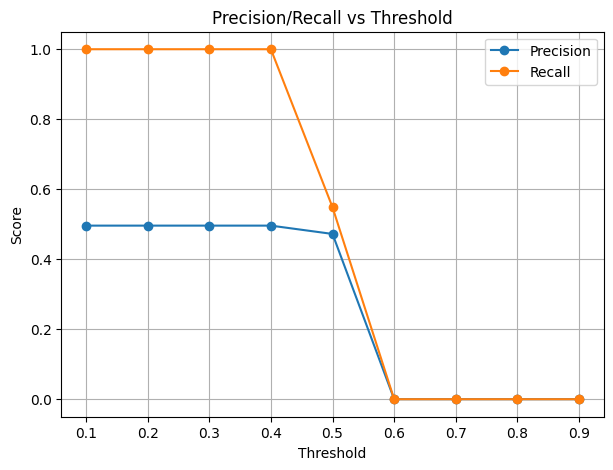

In [4]:
from sklearn.metrics import precision_score, recall_score

probs = clf.predict_proba(X_test_s)[:,1]
thresholds = np.linspace(0.1, 0.9, 9)
prec, rec = [], []

for t in thresholds:
    preds = (probs >= t).astype(int)
    prec.append(precision_score(y_test, preds))
    rec.append(recall_score(y_test, preds))
    print(f"Threshold={t:.2f}, Precision={prec[-1]:.3f}, Recall={rec[-1]:.3f}")

plt.figure(figsize=(7,5))
plt.plot(thresholds, prec, marker='o', label='Precision')
plt.plot(thresholds, rec, marker='o', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision/Recall vs Threshold')
plt.legend(); plt.grid(True)
plt.show()

# Section 8 — Interpretazione dei Coefficienti nella Logistic Regression

Uno dei punti di forza della Logistic Regression è l’interpretabilità:  
ogni coefficiente \(w_j\) indica come una caratteristica influenza il logit e, di conseguenza, la probabilità della classe positiva.

Questa sezione chiarisce:

- come leggere i coefficienti linearmente,
- come interpretarli in termini di odds ratio,
- quando l’interpretazione è valida e quando smette di esserlo.

---

## 8.1 Coefficienti e logit: interpretazione lineare

La formula centrale è:

\[
z = w^T x + b
\]

Ogni coefficiente \(w_j\) rappresenta quanto il logit cambia quando la variabile \(x_j\) aumenta di un’unità, mantenendo costanti le altre.

Interpretazione:

- \(w_j > 0\): l’aumento della variabile rende più probabile la classe positiva.
- \(w_j < 0\): l’aumento della variabile rende meno probabile la classe positiva.
- |\(w_j\)| grande: la variabile ha forte influenza sulla decisione.
- |\(w_j\)| piccolo: la variabile ha effetto marginale.

Questa interpretazione è valida solo se:

1. la variabile è scalata in modo coerente,  
2. non ci sono forti collinearità,  
3. il modello è regolarizzato o comunque non instabile.

---

## 8.2 Coefficienti e odds ratio

La Logistic Regression modella il logit della probabilità:

\[
\log\left(\frac{p}{1-p}\right) = w^T x + b
\]

Da qui deriva l’odds ratio, un concetto centrale per l’interpretabilità:

\[
\text{Odds Ratio} = e^{w_j}
\]

Interpretazione:

- se \(e^{w_j} = 2\), allora un aumento di una unità in \(x_j\) raddoppia le odds della classe positiva.
- se \(e^{w_j} = 0.5\), dimezza le odds.
- se \(e^{w_j} = 1\), non ha alcun effetto.

L’odds ratio è molto usato in medicina, finanza, scienze sociali per spiegare l’effetto delle variabili in termini concreti.

---

## 8.3 Importanza della scala delle variabili

La magnitudine di un coefficiente dipende dalla scala della variabile.

Esempio:

- un coefficiente 0.1 su “salario annuale” (in euro) è difficile da interpretare;
- un coefficiente 2 su una variabile normalizzata può essere più informativo.

Per questo è comune standardizzare tutte le variabili:

\[
x_j \leftarrow \frac{x_j - \mu_j}{\sigma_j}
\]

In questo modo, un coefficiente \(w_j\) indica l’effetto di una variazione di un sigma nella variabile.

---

## 8.4 Effetto della collinearità sull’interpretabilità

Quando due variabili sono molto correlate:

- i coefficienti diventano instabili,
- i segni possono invertire direzione,
- piccole variazioni nei dati producono cambiamenti enormi in \(w_j\),
- l’interpretazione per singola variabile diventa non affidabile.

Esempio classico: reddito, patrimonio e risparmi sono spesso correlati.  
Il modello può distribuire il peso tra di essi in modo arbitrario.

La regolarizzazione L2 riduce drasticamente questo problema distribuendo il peso tra variabili correlate.

---

## 8.5 Tre esempi reali di interpretazione dei coefficienti

### Esempio 1 — Rischio bancario  
Se il coefficiente della variabile “numero di rate pagate in ritardo” vale 1.2:

\[
e^{1.2} \approx 3.32
\]

Le odds di default aumentano di oltre tre volte per ogni ritardo aggiuntivo.

---

### Esempio 2 — Diagnostica medica  
Supponiamo un coefficiente di -0.8 per “colesterolo HDL”.  

\[
e^{-0.8} \approx 0.45
\]

Un aumento dell’HDL riduce le odds della malattia della metà.  
Questo tipo di interpretazione è molto utile nei report clinici.

---

### Esempio 3 — Marketing e propensione all’acquisto  
Se la variabile “visite al sito negli ultimi 7 giorni” ha coefficiente 0.3:

\[
e^{0.3} \approx 1.35
\]

Ogni visita aggiuntiva aumenta le odds di acquisto del 35%.

---

## 8.6 Quando l’interpretazione diventa inaffidabile

L’interpretazione dei coefficienti non è sempre valida.  
Diventa debole quando:

1. il modello è instabile (assenza di regolarizzazione),
2. le variabili non sono scalate,
3. c’è collinearità,
4. il modello è troppo complesso e sovradattato,
5. la feature non ha relazione lineare con il logit.

In questi casi, il significato dei coefficienti perde valore descrittivo.

---

## 8.7 Metodo di pensiero per interpretare correttamente i coefficienti

### Metodo 1 — Verificare sempre la scala  
Se due variabili hanno scale diverse, i coefficienti non sono paragonabili.

---

### Metodo 2 — Controllare la collinearità  
La presenza di collinearità rende i coefficienti numericamente poco affidabili, anche se il modello predice bene.

---

### Metodo 3 — Ragionare in termini di odds, non di probabilità  
I coefficienti agiscono sul logit e sulle odds, non direttamente sulla probabilità.  
Se si vuole interpretare correttamente l’effetto di una variabile, è necessario passare tramite \(e^{w_j}\).

---

## 8.8 Conclusione della sezione

La Logistic Regression non produce semplicemente un confine lineare:  
produce coefficienti interpretabili, che permettono di comprendere l’effetto delle variabili sulla probabilità di un evento.

Tuttavia, l’interpretazione è valida solo se:

- il modello è regolarizzato,
- le variabili sono scalate,
- non c’è collinearità,
- si analizzano gli effetti in termini di odds ratio.

Questa sezione pone le basi per comprendere come costruire Logistic Regression che siano non solo accurate, ma anche interpretabili e affidabili.


# Section 9 — Feature Engineering per Modelli Lineari

La Logistic Regression è un modello lineare.  
Questo significa che può imparare soltanto confini lineari nello spazio delle variabili.  
Quando i dati non hanno struttura lineare, l’unico modo per migliorare il modello è trasformare le variabili in modo da rendere la separazione più semplice.

Questa sezione introduce le trasformazioni più utili per potenziare la Logistic Regression.

---

## 9.1 Perché il feature engineering è fondamentale nei modelli lineari

Poiché il modello produce un confine della forma:

\[
w^T x + b = 0
\]

se la relazione tra \(x\) e la classe non è lineare, il modello fallisce.  
Le trasformazioni delle feature permettono di:

- introdurre non linearità,
- ridurre la sensibilità agli outlier,
- rappresentare meglio relazioni complesse,
- stabilizzare i coefficienti.

Feature engineering e regolarizzazione sono i due strumenti principali per rendere la Logistic Regression un modello potente e flessibile.

---

## 9.2 Trasformazioni numeriche utili

### Log-transform
Applicata a variabili con distribuzione molto asimmetrica o con valori estremi:

\[
x' = \log(1 + x)
\]

Riduce l’impatto degli outlier e rende la relazione più lineare.

---

### Standardizzazione
La trasformazione più comune:

\[
x' = \frac{x - \mu}{\sigma}
\]

Vantaggi:

- i coefficienti diventano più interpretabili,
- la regolarizzazione agisce in modo omogeneo,
- la convergenza dell’ottimizzazione migliora.

---

### Scaling dei valori molto grandi
Variabili come reddito, click totali, consumo energetico possono avere scale enormi.  
Una divisione per una costante o un’unità coerente evita coefficienti instabili.

---

## 9.3 Interazioni tra variabili

I modelli lineari non catturano effetti combinati, ad esempio:

- “alto reddito + basso debito” potrebbe essere un segnale forte,
- “alta temperatura + alta umidità” potrebbe essere un predittore sanitario importante.

Per introdurre interazioni:

\[
x_{ij} = x_i \cdot x_j
\]

Le interazioni possono trasformare confini linearmente insufficienti in confini molto efficaci.

---

## 9.4 Termini polinomiali

Per introdurre curvature:

\[
x' = x^2, \quad x^3, \quad \text{ecc.}
\]

I termini quadrati sono spesso sufficienti per rappresentare:

- forme a parabola,
- effetti di saturazione (diminuzione dell’effetto oltre un certo punto),
- relazioni non monotone.

Importante:  
l’aggiunta di termini polinomiali aumenta il rischio di sovradattamento, quindi è essenziale la regolarizzazione.

---

## 9.5 Binning e bucketizzazione

Per variabili con relazione non lineare, è utile suddividere il dominio in intervalli.  
Esempi:

- fasce d’età (18–25, 26–35, 36–50, ecc.),
- livelli di rischio (basso, medio, alto),
- fasce di reddito.

Il modello impara pesi separati per ciascun intervallo, catturando relazioni complesse con struttura semplice.

---

## 9.6 Variable encoding per variabili categoriche

La Logistic Regression richiede variabili numeriche.  
Le categorie devono essere trasformate in modo appropriato.

### One-hot encoding
Rappresenta ciascuna categoria con una variabile binaria.  
È la scelta più comune.

### Target encoding (con attenzione)
Sostituisce la categoria con il valore medio del target all’interno della categoria.  
È potente ma rischioso: possibile leakage, va usato con cross-validation.

---

## 9.7 Tre esempi reali di miglioramento tramite feature engineering

### Esempio 1 — Credit scoring con log-transform  
La variabile “saldo bancario” ha una distribuzione molto asimmetrica.  
Applicando il log-transform, la regressione diventa più stabile e la separazione delle classi migliora.

---

### Esempio 2 — Analisi medica con termini quadratici  
Per variabili fisiologiche (pressione, colesterolo), l’effetto spesso non è lineare.  
Aggiungere \(x^2\) permette al modello di catturare effetti di rischio crescente non proporzionale.

---

### Esempio 3 — Marketing con interazioni tra variabili  
La combinazione “alta frequenza di accesso” e “alta spesa media” è un forte indicatore di conversione, mentre prese singolarmente le due variabili non risultavano sufficienti.  
L’interazione migliora notevolmente la separazione.

---

## 9.8 Cosa evitare nel feature engineering

- Aggiungere troppe variabili derivate senza regolarizzazione.  
- Creare interazioni inutili che aumentano la dimensionalità senza migliorare la separazione.  
- Usare trasformazioni non giustificate dal dominio.  
- Applicare encoding troppo ricchi con dataset piccoli (rischio di leakage).

---

## 9.9 Metodo di pensiero per scegliere le trasformazioni

### Metodo 1 — Guardare il grafico della variabile contro il target  
Se la relazione è curva o a gradini, servono trasformazioni non lineari o binning.

---

### Metodo 2 — Identificare variabili con scala molto diversa  
Differenze di scala generano coefficienti instabili.  
La standardizzazione è la soluzione immediata.

---

### Metodo 3 — Pensare al confine che il modello può rappresentare  
La Logistic Regression produce un confine lineare.  
Domanda chiave:  
“Posso trasformare le feature in modo che la separazione diventi lineare nello spazio trasformato?”

---

## 9.10 Conclusione della sezione

Il feature engineering è essenziale per aumentare il potere espressivo dei modelli lineari.  
Permette di catturare relazioni non lineari, ridurre la sensibilità agli outlier e creare separazioni più efficaci.  
Un modello lineare ben progettato attraverso trasformazioni intelligenti può competere con modelli più complessi, mantenendo però interpretabilità e stabilità.


# Section 10 — Esercizi (senza soluzioni)

Gli esercizi seguenti servono a consolidare i concetti teorici sviluppati nelle sezioni precedenti.  
L’obiettivo è applicare la geometria dei modelli lineari, osservare i loro limiti, comprendere il ruolo della regolarizzazione e riflettere sul tuning della soglia in un modello probabilistico.

---

## A1 — Failure della Logistic Regression su dati non linearmente separabili

**Obiettivo:** osservare empiricamente quando e perché un modello lineare fallisce.

Istruzioni:

1. Genera un dataset artificiale con `make_moons` oppure `make_circles`.  
   Assicurati che il dataset presenti una separazione chiaramente non lineare.

2. Addestra una Logistic Regression standard (senza feature non lineari, senza kernel, senza trasformazioni).

3. Visualizza:
   - la distribuzione dei punti,
   - la decision boundary stimata,
   - la probabilità stimata nello spazio bidimensionale.

4. Descrivi in modo rigoroso i segnali di fallimento del modello, ad esempio:
   - confine non coerente con i cluster,
   - elevata incertezza attorno a molte regioni,
   - bassa qualità predittiva nonostante un dataset semplice.

---

## A2 — Effetto di L1 e L2 in presenza di collinearità

**Obiettivo:** analizzare la stabilità dei coefficienti quando le feature sono fortemente correlate.

Istruzioni:

1. Genera un dataset artificiale con due o più variabili collinearie (ad esempio creando una feature come combinazione lineare di un’altra).

2. Addestra due modelli:
   - Logistic Regression con regolarizzazione L1,
   - Logistic Regression con regolarizzazione L2.

3. Confronta i coefficienti ottenuti:
   - magnitudine,
   - stabilità,
   - interpretabilità,
   - presenza o assenza di coefficienti annullati (solo per L1).

4. Commenta come la collinearità influenza:
   - l’instabilità dei parametri,
   - l’affidabilità dell’interpretazione dei coefficienti,
   - la differenza di comportamento tra L1 e L2.

---

## A3 — Ottimizzazione della soglia di classificazione

**Obiettivo:** comprendere come la soglia influenzi precisione e recall.

Istruzioni:

1. Addestra una Logistic Regression su un dataset binario a tua scelta.

2. Per un insieme di soglie comprese tra 0.1 e 0.9, calcola:
   - precision,
   - recall,
   - eventuale F1-score o altra metrica rilevante.

3. Identifica:
   - la soglia ottimale per massimizzare il recall,
   - la soglia ottimale per massimizzare la precisione,
   - la soglia che massimizza F1 (o altra metrica scelta).

4. Spiega in modo critico:
   - perché soglie diverse sono adatte a obiettivi diversi,
   - come la distribuzione delle probabilità influenza la scelta,
   - quali compromessi emergono tra precisione e copertura.

---



# Section 11 — Conclusioni

I modelli lineari rappresentano uno dei fondamenti della modellazione statistica.  
La loro forza non risiede nella complessità geometrica, ma nella capacità di fornire una struttura chiara, interpretabile e matematicamente controllabile.  
Questa lezione ha mostrato come il comportamento della Logistic Regression sia governato da tre elementi principali: la geometria del confine lineare, la funzione logistica che trasforma i logit in probabilità e la log-loss che orienta l’ottimizzazione.

Dal punto di vista geometrico, il modello è semplice: separa lo spazio attraverso un iperpiano.  
Tuttavia, questa semplicità diventa un limite quando i dati non presentano una separazione lineare.  
In questi casi, senza trasformazioni adeguate delle feature, il modello fallisce nel catturare strutture curve, annidate o non monotone.

La regolarizzazione svolge un ruolo centrale nella stabilizzazione del modello.  
Agisce sul comportamento dei coefficienti, controllando problemi quali la collinearità, l’instabilità numerica e la sensibilità agli outlier.  
Attraverso L1, L2 o Elastic Net, il modello può mantenere interpretabilità e robustezza anche in presenza di molte variabili o relazioni complesse.

La soglia di classificazione evidenzia l’aspetto decisionale del modello.  
Pur non modificando la geometria del confine, essa influisce direttamente sulle scelte operative: permette di adattare il comportamento del classificatore ai costi reali degli errori, alle priorità applicative e alla distribuzione delle probabilità predette.

In sintesi, la lezione ha costruito le basi concettuali che saranno necessarie per comprendere modelli più avanzati.  
La struttura della Logistic Regression — basata su confini lineari, separazioni geometriche e probabilità calibrate — introduce naturalmente ai metodi a margine massimo e all’uso dei kernel.  
Questi strumenti estendono la capacità di separazione dei modelli lineari, permettendo di affrontare i casi in cui la geometria dei dati richiede confini non lineari o trasformazioni implicite nello spazio delle feature.


# Appendice Tecnica — Bignami 

Questa appendice riassume tutti i concetti fondamentali della Logistic Regression e dei modelli lineari, con spiegazioni sintetiche ma precise.  
Include una spiegazione chiara della regolarizzazione L1, L2 ed Elastic Net.

---

## 1. Modello lineare

\[
z = w^T x + b
\]

- \(x\): vettore delle feature (le variabili in input).  
- \(w\): pesi che indicano quanto ogni feature contribuisce alla decisione.  
- \(b\): bias, sposta il confine.  
- \(z\): logit, misura quanto \(x\) è “dalla parte della classe positiva”.

Confine:

\[
w^T x + b = 0
\]

È una retta in 2D, un piano in 3D, un iperpiano in \(d\) dimensioni.

---

## 2. Sigmoide

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Trasforma il logit in probabilità.  
Non cambia la geometria del confine.

---

## 3. Log-Loss

\[
\ell(y, p) = -[y\log(p) + (1-y)\log(1-p)]
\]

- punisce molto gli errori “sicuri”,
- guida il modello verso probabilità calibrate,
- deriva dalla massima verosimiglianza.

---

## 4. Distanza dal confine

\[
d(x) = \frac{|w^T x + b|}{\|w\|}
\]

Misura quanto la decisione è “confidente”.

---

## 5. Fallimento su dati non lineari

La Logistic Regression fallisce quando i dati richiedono separazioni curve.  
Segnali:

- molti errori vicino al confine,  
- confine inclinato male,  
- accuratezza stagnante.

---

## 6. Regolarizzazione: L1, L2 ed Elastic Net

Serve a stabilizzare i coefficienti, evitare sovradattamento e controllare la collinearità.

### L2 (Ridge)
\[
\text{Loss} + \lambda \|w\|^2
\]
- riduce tutti i coefficienti in modo morbido;  
- non annulla i pesi;  
- stabilizza in presenza di collinearità.

### L1 (Lasso)
\[
\text{Loss} + \lambda \|w\|_1
\]
- porta molti coefficienti esattamente a zero;  
- fa selezione automatica delle feature;  
- utile con molte variabili irrilevanti.

### Elastic Net
\[
\alpha \|w\|_1 + (1 - \alpha)\|w\|_2^2
\]
- combina selezione (L1) e stabilità (L2);  
- ideale con molte feature correlate.

---

## 7. Collinearità

Due feature sono collineari se una può essere approssimata dall’altra.  
Problemi principali:

- coefficienti instabili,  
- interpretazione poco affidabile,  
- pesi che cambiano molto con piccoli cambiamenti nei dati.

La regolarizzazione L2 è il rimedio principale.

---

## 8. Interpretazione dei coefficienti

- \(w_j > 0\): aumenta la probabilità della classe positiva;  
- \(w_j < 0\): la diminuisce.

Interpretazione tramite odds ratio:

\[
e^{w_j}
\]

- >1 → aumenta le odds della classe positiva,  
- <1 → le diminuisce.

Interpretazione valida solo se:  
le feature sono scalate, non c’è collinearità, il modello è regolarizzato.

---

## 9. Threshold tuning

Il modello produce probabilità, non classi.  
La soglia \(t\) determina la decisione:

- soglia bassa → alto recall, bassa precisione;  
- soglia alta → alta precisione, basso recall.

Strumenti: ROC, precision-recall curve.

---

## 10. Feature engineering

Strumenti per rendere linearmente separabili dati non lineari:

- log-transform per variabili asimmetriche,  
- standardizzazione per stabilità numerica,  
- interazioni tra variabili,  
- termini polinomiali,  
- binning e bucketizzazione,  
- one-hot encoding.

---

## 11. Quando usare la Logistic Regression

Da usare quando:
- serve interpretabilità,
- il rapporto tra feature e target è quasi lineare,
- le probabilità calibrate sono importanti.

Da evitare quando:
- il confine è chiaramente non lineare,
- servono interazioni complesse non modellabili con feature engineering limitato.

